<a href="https://colab.research.google.com/github/onecme/dataMining/blob/main/TI09_ElyasRandiRenaldi_0110223277_PratikumMandiri1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/500_Person_Gender_Height_Weight_Index_tugas1_dataMining.csv')

In [3]:
print(dataset)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [4]:
dataset.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
dataset.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [7]:
dataset.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
dataset.isnull().sum()

,0
Gender,0
Height,0
Weight,0
Index,0


In [9]:
statistic_by_gender = dataset.groupby('Gender').agg({
    'Height': ['count', 'mean', 'min', 'max'],
    'Weight': ['count', 'mean', 'min', 'max']
})


In [10]:
statistic_by_gender['Height']

,count,mean,min,max
Gender,,,,
Female,255,170.227451,140,199
Male,245,169.648980,140,199


In [11]:
statistic_by_gender['Weight']

,count,mean,min,max
Gender,,,,
Female,255,105.698039,50,160
Male,245,106.314286,50,160


In [12]:
replacements={
    'Gender':{'Male':1, 'Female':0}
}
dataset.replace(replacements, inplace=True)

<ipython-input-12-4578a81afe02>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace(replacements, inplace=True)


In [13]:
dataset.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [14]:
dataset['Index'].value_counts()

,count
Index,
5,198
4,130
2,69
3,68
1,22
0,13


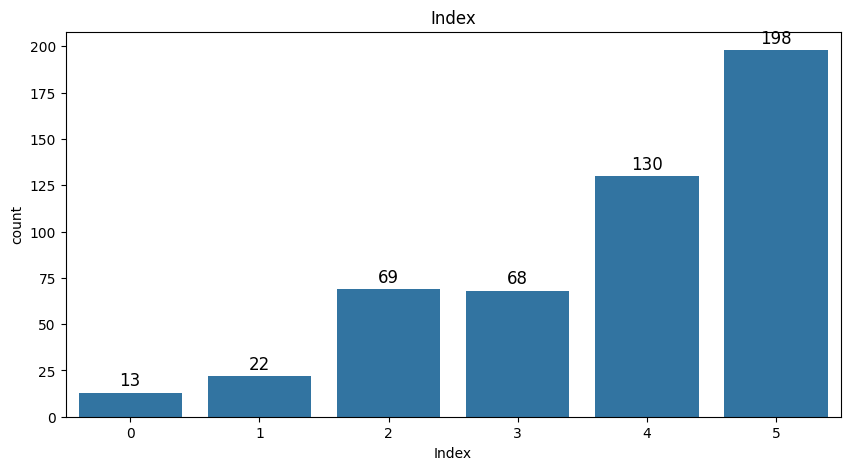

In [15]:
fig, axes = plt.subplots(nrows= 1, ncols=1, figsize=(10,5))

sns.countplot(x='Index', data=dataset, ax=axes)
axes.set_title('Index')
for p in axes.patches:
  axes.annotate(
      f'{int(p.get_height())}',
      (p.get_x() + p.get_width()/2., p.get_height()),
      ha='center', va='baseline', fontsize=12, color='black', xytext=(0,5),
      textcoords='offset points'
  )


plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


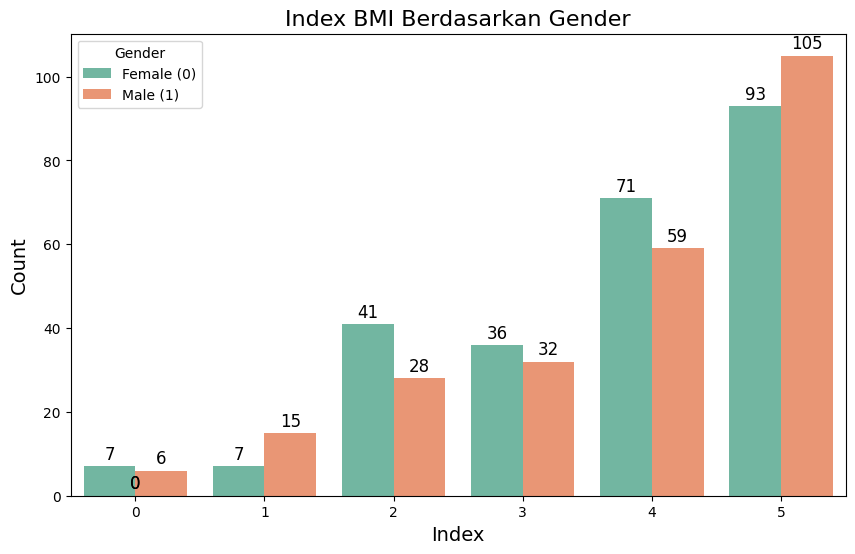

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='Index', hue='Gender', data=dataset, palette='Set2')

plt.title("Index BMI Berdasarkan Gender", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)

for p in plt.gca().patches:
  plt.gca().annotate(
      f'{int(p.get_height())}',
      (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
      textcoords='offset points'
  )


plt.legend(title='Gender', labels=['Female (0)', 'Male (1)'])
plt.show()